# Notebook 5: Testing Explanations

__In this notebook__, we will test two proposed explanations (hypotheses) of how cholera spread in London: through the **air** and through the **water**. That is, we will show that some hypotheses are likely a better fit for the data and are harder to reject, in a ***statistically significant*** way, than others.

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/santa_p.png?raw=true" alt="Drawing" width="500"> </td>
</tr></table>

**By the end of this notebook, you should be able to**:
- Understand the idea of how experiments can be conducted with data.
- Create and interpret contingency tables and the $Chi^2$ statistic.
- Apply this to two theories about how cholera was transmitted.
- Create data visualizations.
<br><br>

## 4.1: The Data

Let's begin by loading our data...


This data looks different than our prior data. This is because people in charge of the city’s sewers went door-to-door in a neighborhood hard hit by cholera deaths in 1849 to assess the claim that toxic fumes from its sewers were causing the deaths. They collected data from 1,852 households in total, described as follows:
- **house_ID:** unique indetifier for house
- **deaths:** the total deaths in that house
- **dis_sewers:** distance (in meters) from the nearest sewer (1 meter = 3.3 feet)
- **dis_bspump:** distance (in meters) from the Broad St pump

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

house_data = pd.read_csv('https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/Datasets/deaths_by_house.csv?raw=true')
house_data

,house_ID,deaths,dis_sewers,dis_bspump
0,1,0,10.08,125.00
1,2,1,14.64,119.94
2,3,0,18.47,116.27
3,4,0,22.98,112.56
4,5,0,27.47,109.10
...,...,...,...,...
1847,1848,0,22.11,191.88
1848,1849,0,4.75,197.54
1849,1850,0,18.06,261.31
1850,1851,0,6.00,286.47


## 4.2: Introducing the Idea of Data Experiments

There are many ways to do an experiment with data. The methods we use depend on a variety of things like the question we are trying to answer, what kind of data we are working with and how we hope to communicate our findings.

You used correlations before to explore whether there is a positive, negative (or no!) relationship between two variables. You also assessed how strong this relationship is and whether it is statistically significant. In this case, the variables had values that ranged across a whole continuum of numbers, i.e. they were **continuously distributed**. For example, population density could be a number anywhere between 0 and infinity.

What you’ll do in this notebook is convert continuously distributed data into **categorical data** (categories). Why? Because you can  group your data in a way that allows you to compare the outcome in one group to that of another group, contingent on a condition. The condition will be the potential explanation you want to explore across groups to see if it has a differential impact.

In the case of the airborne and waterborne theories, we can separate people into groups. The exposed group (people living near a sewer or the water pump) is often called an **impact** or **treatment group** while the unexposed group (people living far from a sewer or the water pump) is the **control group**. When testing the waterborne theory, we will group people based on whether they lived near a sewer or not and whether they died of cholera or not. When testing the airborne theory, we will group people based on whether they lived near a certain water pump or not and whether they died of cholera or not.

This will result in four groups for each proposed explanation. We will place them in a 2x2 **contingency table** (also called a ***two-way table*** or ***crosstab***). We will have to test each explanation separately. In all, that means four contingency tables: an expected (null) and an observed table for each of the two hypotheses.

## 4.3: The Airborne Hypothesis: Investigating the Sewers

Now that we've talked about how to set up our experiment, let's apply this to the cholera data!

The first theory we will explore assumes that cholera is airborne and that people get infected by inhaling toxic fumes from localized sources. In this case, the source is fumes emitted from sewage lines through gully holes (man holes).


<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/sewer.jpeg?raw=true" alt="Drawing" width="500"> </td>
</tr></table>

If this theory was true, then closer proximity to sewers would make it more likely to inhale the toxic air and contract cholera. For simplicity, let us assume someone is 'close' to a sewer if they less than 40 feet (12.2 meters) from one... otherwise they are 'far'. Unfortunately, we don't have the total number of people in each house. That data was not collected.  Therefore, we will have to count houses instead of people.

A contingency table simply shows the total frequencies of each variable, with one variable appearing on each axis. It technically does not matter, but a common approach is to put the independent (explanatory) variable on the x-axis and the dependent (outcome) variable on the y-axis.  While there *are* libraries to create contingency tables for us, we will build some ourselves in order to better understand it! (and, well, to get some more practice with PANDAS!!)

Here is the contingency table for the airborne theory with totals along the bottom and right side:

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/sewer_contingency.jpeg?raw=true" alt="Drawing" width="700"> </td>
</tr></table>


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4a:** Predictions</font>

**We will test the airborne theory by assuming the null hypothesis is true. If there was support for the alternative hypothesis (There is an association between proximity to a sewer and cholera), what do you predict the observed contingency table will look like? In other words, which of the four groups will have more counts than others?**

> Write your answer here!


### Calculating Values

A lot of data will go into our contingency tables. Let's calculate that data and put into variables. This includes:

- total houses with a death from cholera: `total_deaths`
- total houses without a death from cholera: `total_nondeaths`
- total houses near a sewer: `total_near_sewer`
- total houses far from a sewer: `total_far_sewer`
- total number of houses: `total_houses`

In [ ]:
total_deaths = sum(house_data['deaths'] >= 1)

total_nondeaths = sum(house_data['deaths'] == 0)

total_near_sewer = sum(house_data['dis_sewers'] <= 12.2)

total_far_sewer = sum(house_data['dis_sewers'] > 12.2)

total_houses = total_near_sewer + total_far_sewer


print(f"Number of houses with a death: {total_deaths}")
print(f"Number of houses without a death: {total_nondeaths}")
print(f"Number of houses near a sewer: {total_near_sewer}")
print(f"Number of houses far from a sewer: {total_far_sewer}")
print(f"Total number of houses: {total_houses}")

Number of houses with a death: 369
Number of houses without a death: 1483
Number of houses near a sewer: 553
Number of houses far from a sewer: 1299
Total number of houses: 1852


### Building the Null Contingency Table

We now need to construct the contingency table under the null hypothesis. In other words, **how many deaths and nondeaths we would expect if there was no relationship between sewers and cholera**.

Remember, we can automate the calculation for each of the four groups using the following equation:

$$expected \ value = {row \ total \times column \ total \over grand \ total}$$



In [ ]:
# round() turns our calculation into a whole number

exp_near_sewer_deaths = int(total_deaths * total_near_sewer / total_houses)

exp_near_sewer_nondeaths = int(total_nondeaths * total_near_sewer / total_houses)

exp_far_sewer_deaths = int(total_deaths * total_far_sewer / total_houses)

exp_far_sewer_nondeaths = int(total_nondeaths * total_far_sewer / total_houses)

print(f"Expected houses near a sewer with a death: {exp_near_sewer_deaths}")
print(f"Expected houses near a sewer without a death: {exp_near_sewer_nondeaths}")
print(f"Expected houses far from a sewer with a death: {exp_far_sewer_deaths}")
print(f"Expected houses far from a sewer without a death: {exp_far_sewer_nondeaths}")


Expected houses near a sewer with a death: 110
Expected houses near a sewer without a death: 442
Expected houses far from a sewer with a death: 258
Expected houses far from a sewer without a death: 1040


In [ ]:
# Now let's put it all together into a contingency table with the following shape!

def visualize_contingency_table(contingency_table, top_labels, left_labels):
    # print("\t\t  Close | Far ")
    print('{:<15s} {:<15s} {:<20s}'.format(top_labels[0], top_labels[1], top_labels[2]))

    i = 0
    for line in contingency_table:
        print('{:<15s} {:<15d} {:<20d}'.format(left_labels[i], contingency_table[i][0], contingency_table[i][1]))
        i += 1

top_labels = [" ", "Near Sewer", "Far from Sewer"]
left_labels = ["Deaths", "Non Deaths", "Total"]


In [ ]:
contingency_table = [
    [exp_near_sewer_deaths, exp_far_sewer_deaths],
    [exp_near_sewer_nondeaths, exp_far_sewer_nondeaths]
]

print("Expected (Null) Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Expected (Null) Contingency Table:
                Near Sewer      Far from Sewer      
Deaths          110             258                 
Non Deaths      442             1040                


### Building the Observed Contingency Table

In [ ]:
obs_near_sewer_deaths = sum((house_data.deaths != 0) & (house_data.dis_sewers <= 12.2))

obs_near_sewer_nondeaths = sum((house_data.deaths == 0) & (house_data.dis_sewers <= 12.2))

obs_far_sewer_deaths = sum((house_data.deaths != 0) & (house_data.dis_sewers > 12.2))

obs_far_sewer_nondeaths = sum((house_data.deaths == 0) & (house_data.dis_sewers > 12.2))

print(f"Observed houses near a sewer with a death: {obs_near_sewer_deaths}")
print(f"Observed houses near a sewer without a death: {obs_near_sewer_nondeaths}")
print(f"Observed houses far from a sewer with a death: {obs_far_sewer_deaths}")
print(f"Observed houses far from a sewer without a death: {obs_far_sewer_nondeaths}")


Observed houses near a sewer with a death: 117
Observed houses near a sewer without a death: 436
Observed houses far from a sewer with a death: 252
Observed houses far from a sewer without a death: 1047


In [ ]:
contingency_table = [
    [obs_near_sewer_deaths, obs_far_sewer_deaths],
    [obs_near_sewer_nondeaths, obs_far_sewer_nondeaths]
]

print("Observed Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Observed Contingency Table:
                Near Sewer      Far from Sewer      
Deaths          117             252                 
Non Deaths      436             1047                


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4b:** On First Glance</font>

**Does there appear to be a significant difference between the expected number under the null hypothesis and the observed numbers?**

> Write your answer here!


### Calculating the p-value

There is a difference between the expected and observed contingency tables, but is it large enough to reject the null hypothesis and accept the alternative that living close to a sewer is associated with higher cholera rates? The p-value will tell us the chance that the difference we are seeing could be due to random chance.

In [ ]:
# Import the scipy library for running Chi-square evaluations
from scipy.stats import chi2_contingency

# ... when doing data science in Python, it is common convention to use
#.    "_" characters to mark variables whose values we don't need.
_, p_value, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p_value:.2f}")

p-value: 0.42


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4c:** Interpreting p-value for $Chi^2$ test: Sewers</font>

**Based on the p-value of your $Chi^2$ test, can you reject the null hypothesis (there is no association between living close to a sewer and dying from cholera) and accept the alternative (there is an association between living close to a sewer and dying from cholera)?**

> Write your answer here!

### Visualizing the Data

An important part of data science is not only determining statistical significance of hypotheses, but also communicating your findings to people without a statistics background.

Imagine reading a newspaper headline (like below) that says ’The p-value was below 0.05’... the average person does not know what this means! Visualizing your results is an important step in convincing others that your evidence is compelling! In the following, we create (and interpret) data visualizations that make it easier to understand your statistical results.

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/funny_paper.jpeg?raw=true" alt="Drawing" width="500"> </td>
</tr></table>



We first explore a **bar graph**, which can be used to show differences in the frequency (or count) of various categories. (In this case, our categories are deaths and non-deaths of people close and far from the sewer).

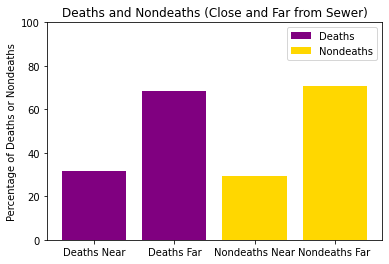

In [ ]:
# Bar Graph

# Let's calculate the percentages of deaths that are 'close' versus 'far'.
#    Close Deaths + Far Deaths should sum to 1!
# (then we can do the same for non-death graphs)
obs_near_sewer_deaths_pct = obs_near_sewer_deaths / (obs_near_sewer_deaths + obs_far_sewer_deaths) * 100
obs_far_sewer_deaths_pct = 100 - obs_near_sewer_deaths_pct

obs_near_sewer_nondeaths_pct = obs_near_sewer_nondeaths / (obs_near_sewer_nondeaths + obs_far_sewer_nondeaths) * 100
obs_far_sewer_nondeaths_pct = 100 - obs_near_sewer_nondeaths_pct



# 1. Let's first view the CLOSE deaths vs nondeaths.
plt.bar(x=['Deaths Near', 'Deaths Far'],
        height=[obs_near_sewer_deaths_pct, obs_far_sewer_deaths_pct], color='purple', label='Deaths')

# 2. Let's first view the FAR deaths vs nondeaths.
plt.bar(x=['Nondeaths Near', 'Nondeaths Far'],
        height=[obs_near_sewer_nondeaths_pct, obs_far_sewer_nondeaths_pct], color='gold', label='Nondeaths')
plt.ylim((0,100))
plt.ylabel("Percentage of Deaths or Nondeaths")
plt.title("Deaths and Nondeaths (Close and Far from Sewer)")
plt.legend()
plt.show()

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4d:** The 3 Second Rule</font>

The 3 Second Rule states that one gets 3 seconds to grab someone's attention and flag the take-home point of a data visualization: https://stephanieevergreen.com/the-3-second-rule/

**What does the bar graph communicate to you? Does it follow the 3 Second Rule?**

> Write your answer here!

<br>



## 4.4: The Waterborne Hypothesis: Investigating the Broad Street Pump

Next, we want to explore the theory that cholera was transmitted through contaminated water. At the time, John Snow guessed that the water of a particular pump, the Broad Street Pump (BSP, for short), might have carried pieces of poisonous sewage. Was this true?

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/pump3.jpeg?raw=true" alt="Drawing" width="500"> </td>
</tr></table>

If this theory was true, then closer proximity to the Broad Street Pump would make it more likely to drink its contaminated water and contract cholera. For simplicity, let us assume someone is 'close' to the Broad Street Pump if they are at most 460 feet (140 meters) from it... otherwise they are 'far'. Unfortunately, we don't have the total number of people in each house. That data was not collected.  Therefore, we will have to count houses instead of people.

A contingency table simply shows the total frequencies of each variable, with one variable appearing on each axis. It technically does not matter, but a common approach is to put the independent (explanatory) variable on the x-axis and the dependent (outcome) variable on the y-axis. While there are libraries to create contingency tables for us, we will build some ourselves in order to better understand it! (and, well, to get some more practice with PANDAS!!)

Here is the contingency table for the waterborne theory with totals along the bottom and right side:

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/pump_contingency.jpeg?raw=true" alt="Drawing" width="700"> </td>
</tr></table>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4e:** Predictions</font>

**We will test the waterborne theory by assuming the null hypothesis is true. If there was support for the alternative hypothesis (There is an association between proximity to the Broad Street Pump and cholera), what do you predict the observed contingency table will look like? In other words, which of the four groups will have more counts than others?**

> Write your answer here!


### Calculating Values

A lot of data will go into our contingency tables. Let's calculate that data and put into variables. This includes:

- total houses with a death from cholera: `total_deaths`
- total houses without a death from cholera: `total_nondeaths`
- total houses near the Broad Street Pump: `total_near_pump`
- total houses far from the Broad Street Pump: `total_far_pump`
- total number of houses: `total_houses`

In [ ]:
total_deaths = sum(house_data['deaths'] >= 1)

total_nondeaths = sum(house_data['deaths'] == 0)

total_near_pump = sum(house_data['dis_bspump'] <= 140)

total_far_pump = sum(house_data['dis_bspump'] > 140)

total_houses = total_near_pump + total_far_pump


print(f"Number of houses with a death: {total_deaths}")
print(f"Number of houses without a death: {total_nondeaths}")
print(f"Number of houses near the Broad Street Pump: {total_near_pump}")
print(f"Number of houses far from the Broad Street Pump: {total_far_pump}")
print(f"Total number of houses: {total_houses}")

Number of houses with a death: 369
Number of houses without a death: 1483
Number of houses near the Broad Street Pump: 406
Number of houses far from the Broad Street Pump: 1446
Total number of houses: 1852


### Building the Null Contingency Table

We now need to construct the contingency table under the null hypothesis. In other words, **how many deaths and nondeaths we would expect if there was no relationship between sewers and cholera**.

Remember, we can automate the calculation for each of the four groups using the following equation:

$$expected \ value = {row \ total \times column \ total \over grand \ total}$$



In [ ]:
# round() turns our calculation into a whole number

exp_near_pump_deaths = int(total_deaths * total_near_pump / total_houses)

exp_near_pump_nondeaths = int(total_nondeaths * total_near_pump / total_houses)

exp_far_pump_deaths = int(total_deaths * total_far_pump / total_houses)

exp_far_pump_nondeaths = int(total_nondeaths * total_far_pump / total_houses)

print(f"Expected houses near a pump with a death: {exp_near_pump_deaths}")
print(f"Expected houses near a pump without a death: {exp_near_pump_nondeaths}")
print(f"Expected houses far from the Broad Street Pump with a death: {exp_far_pump_deaths}")
print(f"Expected houses far from the Broad Street Pump without a death: {exp_far_pump_nondeaths}")


Expected houses near a pump with a death: 80
Expected houses near a pump without a death: 325
Expected houses far from the Broad Street Pump with a death: 288
Expected houses far from the Broad Street Pump without a death: 1157


In [ ]:
# Now let's put it all together into a contingency table with the following shape!

def visualize_contingency_table(contingency_table, top_labels, left_labels):
    # print("\t\t  Close | Far ")
    print('{:<15s} {:<15s} {:<20s}'.format(top_labels[0], top_labels[1], top_labels[2]))

    i = 0
    for line in contingency_table:
        print('{:<15s} {:<15d} {:<20d}'.format(left_labels[i], contingency_table[i][0], contingency_table[i][1]))
        i += 1

top_labels = [" ", "Near BSP", "Far from BSP"]
left_labels = ["Deaths", "Non Deaths", "Total"]


In [ ]:
contingency_table = [
    [exp_near_pump_deaths, exp_far_pump_deaths],
    [exp_near_pump_nondeaths, exp_far_pump_nondeaths]
]

print("Expected (Null) Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Expected (Null) Contingency Table:
                Near BSP        Far from BSP        
Deaths          80              288                 
Non Deaths      325             1157                


### Building the Observed Contingency Table

In [ ]:
obs_near_pump_deaths = sum((house_data.deaths != 0) & (house_data.dis_bspump <= 140))

obs_near_pump_nondeaths = sum((house_data.deaths == 0) & (house_data.dis_bspump <= 140))

obs_far_pump_deaths = sum((house_data.deaths != 0) & (house_data.dis_bspump > 140))

obs_far_pump_nondeaths = sum((house_data.deaths == 0) & (house_data.dis_bspump > 140))

print(f"Observed houses near the Broad Street Pump with a death: {obs_near_pump_deaths}")
print(f"Observed houses near the Broad Street Pump without a death: {obs_near_pump_nondeaths}")
print(f"Observed houses far from the Broad Street Pump with a death: {obs_far_pump_deaths}")
print(f"Observed houses far from the Broad Street Pump without a death: {obs_far_pump_nondeaths}")


Observed houses near the Broad Street Pump with a death: 207
Observed houses near the Broad Street Pump without a death: 199
Observed houses far from the Broad Street Pump with a death: 162
Observed houses far from the Broad Street Pump without a death: 1284


In [ ]:
contingency_table = [
    [obs_near_pump_deaths, obs_far_pump_deaths],
    [obs_near_pump_nondeaths, obs_far_pump_nondeaths]
]

print("Observed Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Observed Contingency Table:
                Near BSP        Far from BSP        
Deaths          207             162                 
Non Deaths      199             1284                


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4f:** On First Glance</font>

**Does there appear to be a significant difference between the expected number under the null hypothesis and the observed numbers?**

> Write your answer here!


### Calculating the p-value

There is a difference between the expected and observed contingency tables, but is it large enough to reject the null hypothesis and accept the alternative that living close to a sewer is associated with higher cholera rates? The p-value will tell us the chance that the difference we are seeing could be due to random chance.

In [ ]:
# Import the scipy library for running Chi-square evaluations
from scipy.stats import chi2_contingency

# ... when doing data science in Python, it is common convention to use
#.    "_" characters to mark variables whose values we don't need.
_, p_value, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p_value:.5f}")

p-value: 0.00000


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4g:** Interpreting p-value for $Chi^2$ test: Sewers</font>

**Based on the p-value of your $Chi^2$ test, can you reject the null hypothesis (there is no association between living close to the Broad Street Pump and dying from cholera) and accept the alternative (there is an association between living close to the Broad Street Pump and dying from cholera)?**

> Write your answer here!

### Visualizing the Data

An important part of data science is not only determining statistical significance of hypotheses, but also communicating your findings to people without a statistics background.

Imagine reading a newspaper headline (like below) that says ’The p-value was below 0.05’... the average person does not know what this means! Visualizing your results is an important step in convincing others that your evidence is compelling! In the following, we create (and interpret) data visualizations that make it easier to understand your statistical results.

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/funny_paper.jpeg?raw=true" alt="Drawing" width="500"> </td>
</tr></table>


We first explore a **bar graph**, which can be used to show differences in the frequency (or count) of various categories. (In this case, our categories are deaths and non-deaths of people close and far from the sewer).

In [ ]:
# Bar Graph

# Let's calculate the percentages of deaths that are 'close' versus 'far'.
#    Close Deaths + Far Deaths should sum to 1!
# (then we can do the same for non-graphs)
obs_near_pump_deaths_pct = obs_near_pump_deaths / (obs_near_pump_deaths + obs_far_pump_deaths) * 100
obs_far_pump_deaths_pct = 100 - obs_near_pump_deaths_pct

obs_near_pump_nondeaths_pct = obs_near_pump_nondeaths / (obs_near_pump_nondeaths + obs_far_pump_nondeaths) * 100
obs_far_pump_nondeaths_pct = 100 - obs_near_pump_nondeaths_pct



# 1. Let's first view the CLOSE deaths vs nondeaths.
plt.bar(x=['Deaths Near', 'Deaths Far'],
        height=[obs_near_pump_deaths_pct, obs_far_pump_deaths_pct], color='purple', label='Deaths')

# 2. Let's first view the FAR deaths vs nondeaths.
plt.bar(x=['Nondeaths Near', 'Nondeaths Far'],
        height=[obs_near_pump_nondeaths_pct, obs_far_pump_nondeaths_pct], color='gold', label='Nondeaths')
plt.ylim((0,100))
plt.ylabel("Percentage of Deaths or Nondeaths")
plt.title("Deaths and Nondeaths (Close and Far from Broad Street Pump)")
plt.legend()

NameError: name 'obs_near_pump_deaths' is not defined

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 4h:** The 3 Second Rule</font>

The 3 Second Rule states that one gets 3 secons to grab someone's attention and flag the take-home point of a data visualization: https://stephanieevergreen.com/the-3-second-rule/

**What does the bar graph communicate to you? Does it follow the 3 Second Rule?**

> Write your answer here!

<br>



## 4.5: Reflection
<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4>**Journal 4i:** Reflection </font>

**What do you understand better after this notebook than before?**
> Write your answer here!

**Please fill out the Notebook survey here!**
> https://forms.gle/54KHEbPGsRxQU3Bh9

<br>

--------------------------------

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">     **&ensp;&ensp;&ensp;Last step: save your work!** </font>